# Data type에 따른 기본적인 분석 
- learning by implementation 
- 데이터 준비

In [18]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ readr   1.1.1
✔ tibble  1.4.1     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ ggplot2 2.2.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
# 모든 데이터는 데이터 프레임인 것을 가정 했고, dplyr패키지으 tbl_df()함수를 이용하여 
# 보기 좋은 형태로 변환 할 것 
mpg <- tbl_df(mpg)
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


##### Data description 
    -manufacturer: Manufacturer/brand name
    -model: Car model name
    -displ: Engine displacement, in litres
    -year: Year of manufacture
    -cyl: Number of cylinders
    -trans: Type of transmission
    -drv: f = front-wheel drive, r = rear wheel drive, 4 = 4wd
    -cty: City miles per gallon
    -hwy: Highway miles per gallon
    -fl: Fuel type. e = ethanol, d = diesel, r = regular, p =
    -premium, c = natural gas
    -class: The 'type' of car

### 모든 데이터에 행해야 할 분석 
1. 데이터 내용, 구조, 타입을 파악한다. dplyr::glimpse()함수가 유용하다. 이와 더불어, 데이터 구조를 파악 할 수 있는 str(), 데이터 앞부분을 보여주는 head() 등이 유용하다. 
2. 데이터의 summary()를 파악해본다. (Missing value또한 파악 할 수 있다.)
3. 무작정 시각화를 해본다. plot(), pairs() 등, 데이터가 많을 때는 실행시간이 오래 걸리니, dplyr::sample_n() 함수 등을 사용해 표본화한다. 데이터의 변수가 10개 이상 많을 때는 10열 씩 구분하여 살펴보는 것도 유용하다. 

In [7]:
glimpse(mpg)

Observations: 234
Variables: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi"...
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro"...
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0,...
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, ...
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, ...
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "a...
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4",...
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17...
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25...
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p",...
$ class        <chr> "compact", "compact", "compact", "compact", "compact",...


In [12]:
str(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [14]:
summary(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

### 수량형 변수의 분석 
- `데이터 분포의 시각화` : histogram, boxplot, pdf/pmf 등의 시각화를 시도 해본다. 
 > ggplot() + geom_{histogram, density}() 함수를 추천
- 요약 통계량 계산 : summary, mean, median, var, sd, mad, quantile 사용 
- 데이터 정규성 검정 : qqplot, qqline 함수로 분포가 정규분포와 얼마나 비슷한지 눈으로 볼 수 있다. 
- 이상점 찾아보기 : Robust 통계량 계산 

In [37]:
#  통계량 계산
summary(mpg$hwy)
print('mean')
mean(mpg$hwy)
print('median')
median(mpg$hwy)
print('range')
range(mpg$hwy)
quantile(mpg$hwy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   18.00   24.00   23.44   27.00   44.00 

[1] "mean"


[1] 23.44017

[1] "median"


[1] 24

[1] "range"


[1] 12 44

0%  25%  50%  75% 100% 
  12   18   24   27   44

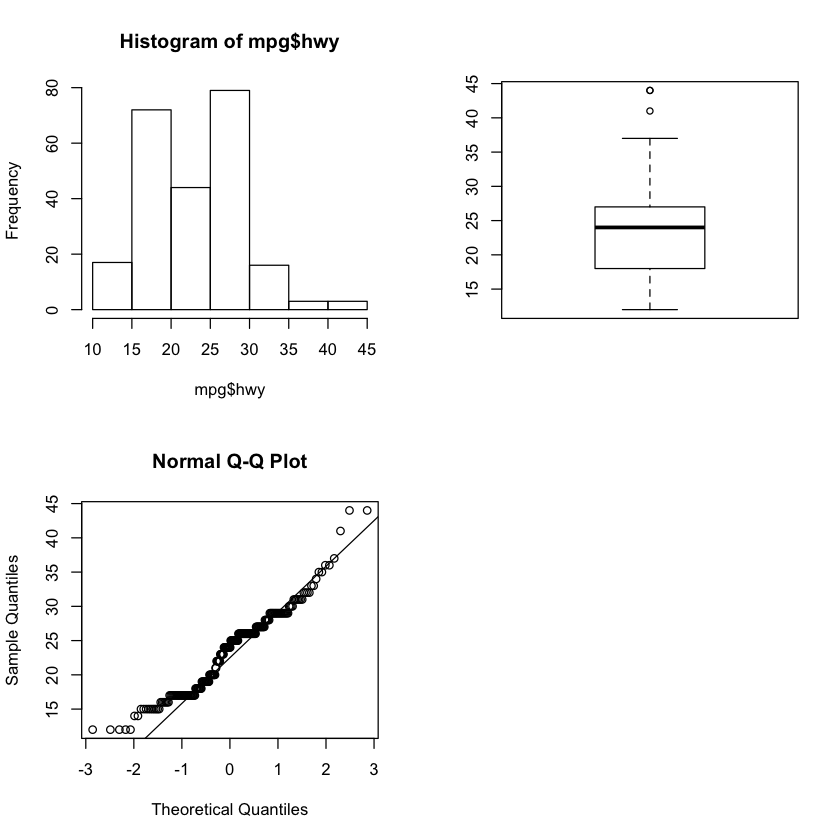

In [30]:
# 시각화 
opar <- par(mfrow=c(2,2))
hist(mpg$hwy) # histogram
boxplot(mpg$hwy) # boxplot
qqnorm(mpg$hwy) # qqplot
qqline(mpg$hwy) # 기준 선 
par(opar)

#### One sample t-test
ex> 
$ H_0 : \mu \leq 22.9 , H_1 : \mu \gt 22.9$

In [38]:
# One side test
hwy <- mpg$hwy
n <- length(hwy)
mu_0 <- 22.9
t.test(hwy, mu = mu_0, alternative="greater")


	One Sample t-test

data:  hwy
t = 1.3877, df = 233, p-value = 0.08328
alternative hypothesis: true mean is greater than 22.9
95 percent confidence interval:
 22.79733      Inf
sample estimates:
mean of x 
 23.44017 


In [43]:
# Two side test
t.test(hwy, mu=mu_0)


	One Sample t-test

data:  hwy
t = 1.3877, df = 233, p-value = 0.1666
alternative hypothesis: true mean is not equal to 22.9
95 percent confidence interval:
 22.67324 24.20710
sample estimates:
mean of x 
 23.44017 


#### Outliers와 Robust 통계 방법 
- 이상치를 확인 하는 가장 기초적인 방법은 boxplot을 그려보는 것 이다. 

> Boxplot에서 outliers는 [Q1 - 1.5 * IQR, Q3 + 1.5 * IRQ] (1.5는 R에서 그려줄 때 계산하는 값, 
꼭 1.5일 필요는 없다. )

- Robust 통계방법은 이상치의 영향을 적게 받는 절차라고 할 수 있다. 기본적으로 평균 대신, 중앙값, 표준편차 대신 MAD(Median Absolute Deviance)를 사용하면 된다. 

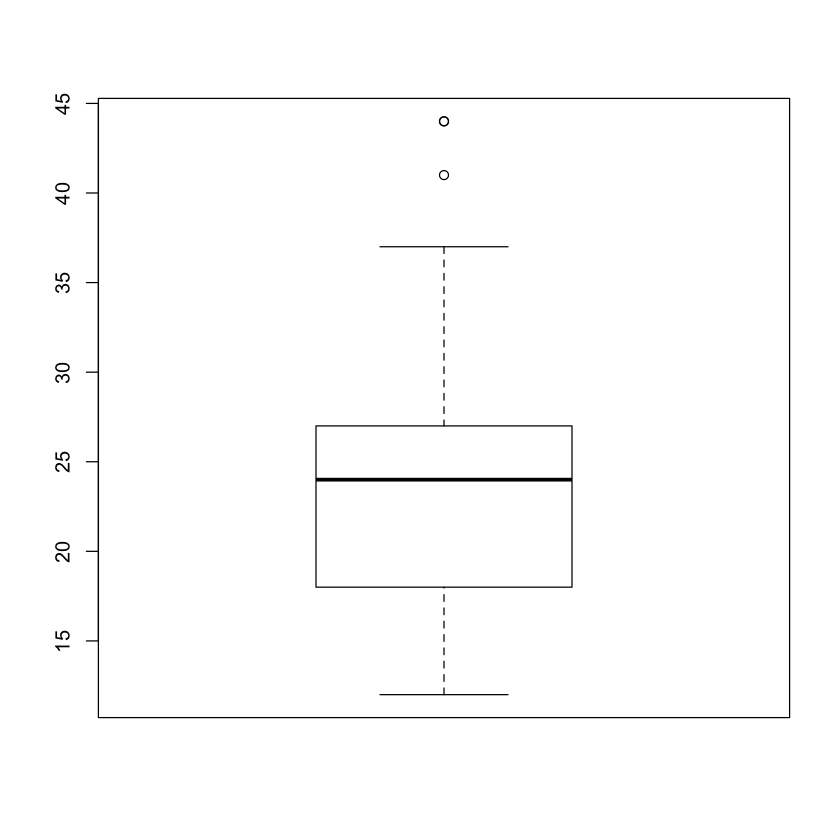

In [51]:
boxplot(hwy)

In [53]:
# Robust 통계량 계산 
c(mean(hwy), sd(hwy))
c(median(hwy), mad(hwy))

[1] 23.440171  5.954643

[1] 24.000  7.413

### Binary Categorical Data Analysis

- summary 계산 : table(), xtab() 등이 있다.  prob.table()함수는 도수를 상대도수로 바꿔준다. table() 함수는 도수 분포를 계산해준다. 결과는 xtabs 클래스 속성도 가지게 된다. 
- 데이터 분포의 시각화를 위해서는 boxplot()이 유용핟. 
- 가설검정과  신뢰구간 : binnorm.test()함수를 이용하면 이항 검정과 신뢰구간을 구할 수 있다. 

In [57]:
set.seed(777)
n <- 100 
p <- 0.5
x <- rbinom(n, 1, p)
x <- factor(x, levels=c(0,1), labels=c('no', 'yes'))
x

[1] yes no  no  yes yes no  no  no  yes no  yes yes yes yes yes no  no  yes
 [19] no  no  no  yes yes no  no  yes no  yes yes yes yes yes yes no  no  no 
 [37] yes no  yes yes no  no  yes no  no  yes yes yes yes no  yes no  no  no 
 [55] no  no  no  yes no  no  yes no  yes no  yes no  no  no  yes yes no  yes
 [73] yes no  no  yes no  yes yes no  no  no  no  no  no  no  no  no  yes yes
 [91] yes no  no  yes no  yes no  no  yes yes
Levels: no yes

In [61]:
table(x)
prop.table(table(x))

x
 no yes 
 54  46 

x
  no  yes 
0.54 0.46 

**가설 **
$H_0 : p = 0.5 , H_1 : p \neq 0.5$

In [62]:
binom.test(x=length(x[x=="yes"]), n=length(x), p=0.5, alternative='two.sided')


	Exact binomial test

data:  length(x[x == "yes"]) and length(x)
number of successes = 46, number of trials = 100, p-value = 0.4841
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3598434 0.5625884
sample estimates:
probability of success 
                  0.46 
